In [1]:
from pathlib import Path
import sys

# Make this path be the project's "base" directory, so we can include modules
notebook_directory_ancestor = Path.cwd().resolve().parent.parent.parent.parent
print(notebook_directory_ancestor)
core_code_directory = notebook_directory_ancestor / "PythonLibraries" / "CoreCode"

is_core_code_directory_in_sys_path = str(core_code_directory) in sys.path
is_notebook_directory_ancestor_in_sys_path = str(notebook_directory_ancestor) in sys.path
print("Is CoreCode directory in sys.path?", is_core_code_directory_in_sys_path)
print("Is notebook directory's ancestor in sys.path?", is_notebook_directory_ancestor_in_sys_path)

if not is_core_code_directory_in_sys_path:
    sys.path.append(str(core_code_directory))

/InServiceOfX
Is CoreCode directory in sys.path? False
Is notebook directory's ancestor in sys.path? False


In [2]:
from corecode.FileIO import (GetJSONAsDict,)
from corecode.Utilities import (
    DataSubdirectories,
    LoadConfigurationFile)

In [3]:
data_sub_dirs = DataSubdirectories()

# Quicktour with runwayml's `stable-diffusion-v1-5`

https://huggingface.co/docs/diffusers/en/quicktour

In [4]:
example_model_subdir = data_sub_dirs.ModelsDiffusion / "runwayml" / "stable-diffusion-v1-5"
print(example_model_subdir)
print(example_model_subdir.exists())

/Data/Models/Diffusion/runwayml/stable-diffusion-v1-5
True


In [14]:
%time
from diffusers import DiffusionPipeline

CPU times: user 1e+03 ns, sys: 1 µs, total: 2 µs
Wall time: 4.05 µs


In [6]:
#import json

In [5]:
#print(example_model_subdir / DiffusionPipeline.config_name)
#f = open(example_model_subdir / DiffusionPipeline.config_name)
#json_loader = json.load(f)
#f.close()
model_config_dict = GetJSONAsDict.get_diffuser_config_as_dict(example_model_subdir)

In [11]:
#print(type(json_loader))
#print(json_loader.keys())

<class 'dict'>
dict_keys(['_class_name', '_diffusers_version', 'feature_extractor', 'safety_checker', 'scheduler', 'text_encoder', 'tokenizer', 'unet', 'vae'])


In [16]:
#(example_model_subdir / "v1-5-pruned-emaonly.safetensors").exists()

True

In [12]:
import torch

In [15]:
#pipeline = DiffusionPipeline.from_pretrained(str(example_model_subdir), use_safetensors=True)
# DiffusionPipeline from diffusers/pipelines/pipeline_utils.py
# local_files_only - whether to only load local model weights and configuration files or not.
# variant ('str') Load weights from specified variant filename such as "fp16" or "ema"
%time
pipeline = DiffusionPipeline.from_pretrained(
    str(example_model_subdir),
    local_files_only=True,
    use_safetensors=True,
    torch_dtype=torch.float16)

CPU times: user 1e+03 ns, sys: 1 µs, total: 2 µs
Wall time: 6.91 µs


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [16]:
%time
pipeline.to("cuda")

CPU times: user 1 µs, sys: 1 µs, total: 2 µs
Wall time: 4.29 µs


StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.28.0.dev0",
  "_name_or_path": "/Data/Models/Diffusion/runwayml/stable-diffusion-v1-5",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [9]:
prompt = "An image of a squirrel in Picasso style"
#neg_prompt = "ugly, blurry, poor quality"
neg_prompt = ""
# See pipeline_stable_diffusion_xl.py in diffusers, pipelines/stable_diffusion_xl
# num_inference_steps: int = 50, i.e. default value of 50
image = pipeline(
    prompt=prompt,
    negative_prompt=neg_prompt,
    height=576,
    width=576,
    num_inference_steps=50,
    target_size=(576,576)).images[0]
print(type(image))

  0%|          | 0/50 [00:00<?, ?it/s]

<class 'PIL.Image.Image'>


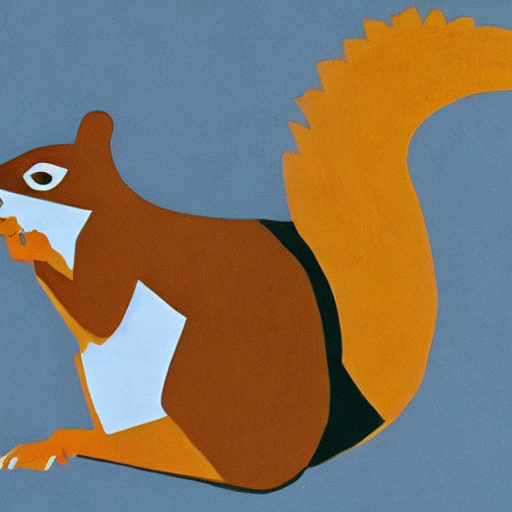

In [10]:
image.show()

In [37]:
prompt = "Photo of prophet Muhammad from Islam from the point of view of Jewish religious texts"
neg_prompt = "ugly, blurry, poor quality"
#neg_prompt = ""
# See pipeline_stable_diffusion_xl.py in diffusers, pipelines/stable_diffusion_xl
# num_inference_steps: int = 50, i.e. default value of 50
image = pipeline(
    prompt=prompt,
    negative_prompt=neg_prompt,
    height=576,
    width=576,
    num_inference_steps=50,
    target_size=(576,576)).images[0]
print(type(image))

  0%|          | 0/50 [00:00<?, ?it/s]

<class 'PIL.Image.Image'>


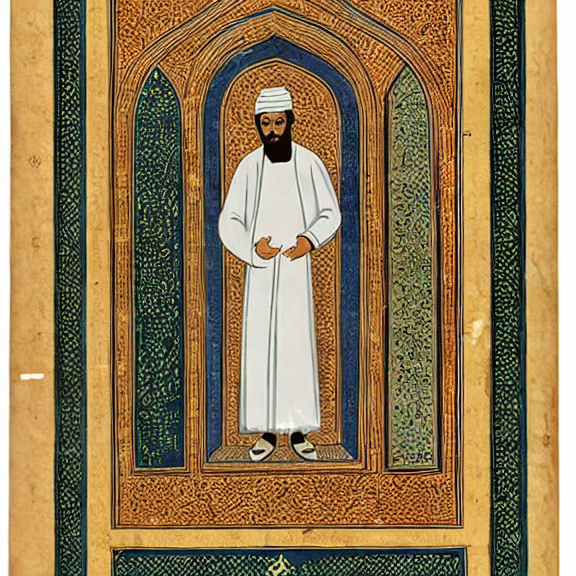

In [38]:
image.show()

## Swapping schedulers

https://huggingface.co/docs/diffusers/en/quicktour

Default is PNDM Scheduler.
https://huggingface.co/docs/diffusers/v0.27.2/en/api/schedulers/pndm#diffusers.PNDMScheduler
PNDMScheduler uses pseudo numerical methods for diffusion models such as the Runge-Kutta and linear multi-step method.

As an example, switch or replace PNDMScheduler with EulerDiscreteScheduler.
https://huggingface.co/docs/diffusers/v0.27.2/en/api/schedulers/euler#diffusers.EulerDiscreteScheduler


In [10]:
print(model_config_dict.keys())
print(model_config_dict["scheduler"])

dict_keys(['_class_name', '_diffusers_version', 'feature_extractor', 'safety_checker', 'scheduler', 'text_encoder', 'tokenizer', 'unet', 'vae'])
['diffusers', 'PNDMScheduler']


In [11]:
from diffusers import EulerDiscreteScheduler

In [18]:
pipeline.scheduler = EulerDiscreteScheduler.from_config(pipeline.scheduler.config)
print(type(pipeline.scheduler))

<class 'diffusers.schedulers.scheduling_euler_discrete.EulerDiscreteScheduler'>


Try to notice a difference.

In [19]:
prompt = "Drawing of a ninja in the style of Kevin Long from Palladium Books"
neg_prompt = "ugly, blurry, poor quality"
#neg_prompt = ""
# See pipeline_stable_diffusion_xl.py in diffusers, pipelines/stable_diffusion_xl
# num_inference_steps: int = 50, i.e. default value of 50
image = pipeline(
    prompt=prompt,
    negative_prompt=neg_prompt,
    height=576,
    width=576,
    num_inference_steps=50,
    target_size=(576,576)).images[0]
print(type(image))

  0%|          | 0/50 [00:00<?, ?it/s]

<class 'PIL.Image.Image'>


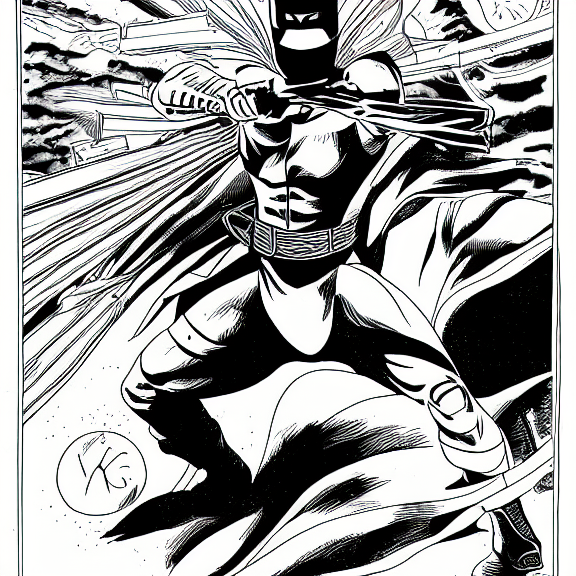

In [21]:
image.show()

In [25]:
print(pipeline.config)
print(pipeline.config['unet'])

FrozenDict([('vae', ('diffusers', 'AutoencoderKL')), ('text_encoder', ('transformers', 'CLIPTextModel')), ('tokenizer', ('transformers', 'CLIPTokenizer')), ('unet', ('diffusers', 'UNet2DConditionModel')), ('scheduler', ('diffusers', 'EulerDiscreteScheduler')), ('safety_checker', ('stable_diffusion', 'StableDiffusionSafetyChecker')), ('feature_extractor', ('transformers', 'CLIPImageProcessor')), ('image_encoder', (None, None)), ('requires_safety_checker', True), ('_name_or_path', '/Data/Models/Diffusion/runwayml/stable-diffusion-v1-5'), ('_class_name', 'StableDiffusionPipeline'), ('_diffusers_version', '0.28.0.dev0')])
('diffusers', 'UNet2DConditionModel')


In [25]:
example_model_subdir = data_sub_dirs.ModelsDiffusion / "stabilityai" / "stable-cascade"
print(example_model_subdir)

/Data/Models/Diffusion/stabilityai/stable-cascade


In [26]:
from diffusers import StableCascadeDecoderPipeline, StableCascadePriorPipeline

In [30]:
prior = StableCascadePriorPipeline.from_pretrained(
    str(example_model_subdir),
    variant="bf16",
    torch_dtype=torch.bfloat16,
    local_files_only=True,
    use_safetensors=True)

Loading pipeline components...:   0%|          | 0/3 [00:00<?, ?it/s]

SafetensorError: Error while deserializing header: HeaderTooLarge

In [31]:
from diffusers import StableCascadeCombinedPipeline

In [32]:
pipe = StableCascadeCombinedPipeline.from_pretrained(
    str(example_model_subdir),
    variant="bf16",
    torch_dtype=torch.bfloat16,
    local_files_only=True,
    use_safetensors=True)

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

SafetensorError: Error while deserializing header: HeaderTooLarge

# segmind / SSD-1B

[segmind / SSD-1B](http://hostname:8888/?token=40c9ebee38b41d4cbd50e0512c68793c7b96a30b534e05ff
)

In [4]:
from diffusers import StableDiffusionXLPipeline
import gc, os, torch

In [5]:
example_model_subdir = data_sub_dirs.ModelsDiffusion / "segmind" / "SSD-1B"
print(example_model_subdir)

/Data/Models/Diffusion/segmind/SSD-1B


In [6]:
# pipeline_utils in diffusers pipelines, 
# local_files_only defaults to False
pipe = StableDiffusionXLPipeline.from_pretrained(
    str(example_model_subdir),
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16",
    local_files_only=True,)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [7]:
%time
pipe.to("cuda")
# The type returned by .to("cuda") is
# class 'diffusers.pipelines.stable_diffusion_xl.pipeline_stable_diffusion_xl.StableDiffusionXLPipeline'>
# We don't assign a variable to it to avoid any copies.
#pipe_to_cuda_result = pipe.to("cuda")
#print(type(pipe_to_cuda_result))

CPU times: user 1 µs, sys: 1 µs, total: 2 µs
Wall time: 3.81 µs


StableDiffusionXLPipeline {
  "_class_name": "StableDiffusionXLPipeline",
  "_diffusers_version": "0.28.0.dev0",
  "_name_or_path": "/Data/Models/Diffusion/segmind/SSD-1B",
  "feature_extractor": [
    null,
    null
  ],
  "force_zeros_for_empty_prompt": true,
  "image_encoder": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "EulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [12]:
prompt = "An astronaut riding a green house"
neg_prompt = "ugly, blurry, poor quality"
# See pipeline_stable_diffusion_xl.py in diffusers, pipelines/stable_diffusion_xl
# num_inference_steps: int = 50, i.e. default value of 50
image = pipe(
    prompt=prompt,
    negative_prompt=neg_prompt,
    height=256,
    width=256,
    num_inference_steps=50,
    target_size=(256,256)).images[0]
print(type(image))

  0%|          | 0/50 [00:00<?, ?it/s]

<class 'PIL.Image.Image'>


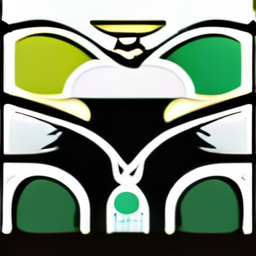

In [14]:
image.show()

In [13]:
prompt = "Drawing of dragon in style of Kevin Long from Palladium Books"
neg_prompt = "ugly, blurry, poor quality"
#neg_prompt = "beautiful, Photo realistic, sharp, high constants, high quality"
#neg_prompt=""
# See pipeline_stable_diffusion_xl.py in diffusers, pipelines/stable_diffusion_xl
# num_inference_steps: int = 50, i.e. default value of 50
image = pipe(
    prompt=prompt,
    negative_prompt=neg_prompt,
    height=576,
    width=576,
    num_inference_steps=75,
    target_size=(576,576)).images[0]

  0%|          | 0/75 [00:00<?, ?it/s]

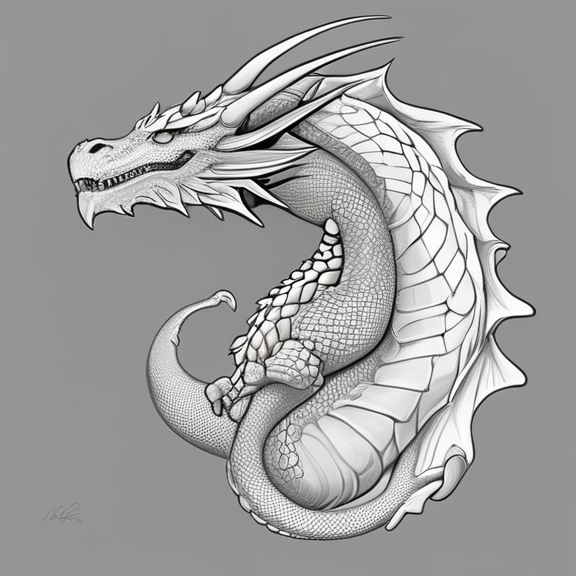

<class 'PIL.Image.Image'>


In [14]:
image.show()
print(type(image))

In [12]:
image.save(str(data_sub_dirs.ModelsDiffusion / "dragon_neg_prompt.jpg"),'JPEG')

In [27]:
from numba import cuda

In [28]:
device = cuda.get_current_device()
print(type(device))
print(device)
device.reset()

<class 'weakref.ProxyType'>
<CUDA device 0 'b'NVIDIA GeForce RTX 3070 Laptop GPU''>


In [15]:
# https://github.com/huggingface/diffusers/issues/3223
del pipe
gc.collect()
if torch.cuda.is_available():
    torch.cuda.empty_cache()
    torch.cuda.ipc_collect()

In [22]:
os.environ["PYTORCH_CUDA_ALLOC_CONF"]="128"
print(os.environ["PYTORCH_CUDA_ALLOC_CONF"])

128


In [13]:
import safetensors
import safetensors.safetensors as safetensors

ModuleNotFoundError: No module named 'safetensors.safetensors'

In [12]:
print(safetensors.safetensors.MAX_HEADER_SIZE)

AttributeError: module 'safetensors' has no attribute 'safetensors'

In [ ]:
import 